# Exploring the corpus

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Description du corpus

In [2]:
path = "../data/txt/"
files = sorted(os.listdir(path))

In [3]:
len(files)

2829

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [4]:
chaine = 'Bxl_1849_Tome_II1_Part_5.txt'

In [5]:
type(chaine)

str

In [6]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['Bxl', '1849', 'Tome', 'II1', 'Part', '5.txt']

In [7]:
# Accéder à l'année
year = chaine_split[1]
year

'1849'

In [8]:
# Manupuler les str pour convertir une année en décennie
year[:3]

'184'

In [9]:
year[-1]

'9'

In [10]:
year[:3] + '0s'

'1840s'

In [11]:
all_years = [str(year) for year in range(1847, 1979)]

In [12]:
dic = defaultdict(int)
dic2 = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f:
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        dic[decade] += 1
        dic2[city] += 1
        dic2[tome] += 1
    else:
        print(f"Anomalous file: {f}")

Anomalous file: bul


In [13]:
print(f"There are {dic2['Bxl']} bulletins from Brussels and {dic2['Lkn']} from Laeken")

There are 2677 bulletins from Brussels and 151 from Laeken


In [14]:
nb_rap = dic2['RptAn']
print(f"{len(files)-nb_rap-1} are real bulletins and {nb_rap} are annual reports")

2646 are real bulletins and 182 are annual reports


In [15]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Missing years: {', '.join(missing_years)}")

Missing years: 1853, 1875, 1916, 1917, 1940, 1941, 1942, 1943, 1944


## Visualisation du nombre de bulletins par décennies

Ces visualisations sont obtenus avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

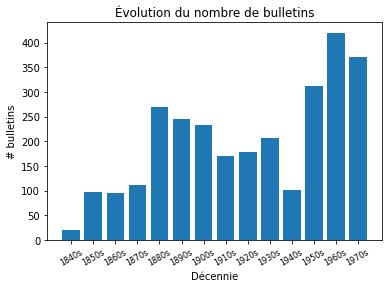

In [16]:
def plot_bar():
    index = np.arange(len(dic))
    plt.bar(index, dic.values())
    plt.xlabel('Décennie')
    plt.ylabel('# bulletins')
    plt.xticks(index, dic.keys(), fontsize=8, rotation=30)
    plt.title('Évolution du nombre de bulletins')
    plt.show()

plot_bar()